<a href="https://colab.research.google.com/github/ppraveenhalingali/VOIS_AICTE_Oct2025_Praveen/blob/main/Airbnb_Open_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_airbnb = pd.read_excel('Airbnb_Open_Data.xlsx', sheet_name='in')
print(df_airbnb.head())
print('Loaded dataset')

        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee  minimum nights  \
0  40.64749 -73.97237  United S

room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64
Computed room type value counts


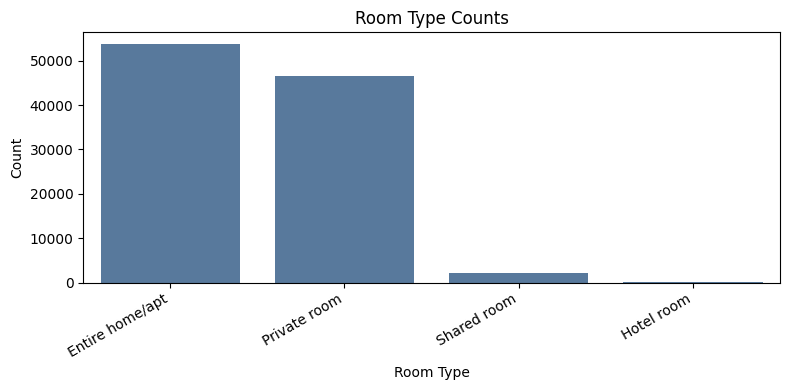

Plotted bar chart of room type counts


In [8]:
# Compute unique values in room type and plot counts as a bar chart
# Assumes df_airbnb is available; if not, load it. Then show value counts and a bar plot.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Airbnb_Open_Data.xlsx'
try:
    df_airbnb
except NameError:
    df_airbnb = pd.read_excel(file_path, sheet_name='in')

room_counts = df_airbnb['room type'].value_counts(dropna=False)
print(room_counts.head(20))
print('Computed room type value counts')

plt.figure(figsize=(8,4))
sns.barplot(x=room_counts.index.astype(str), y=room_counts.values, color='#4C78A8')
plt.title('Room Type Counts')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()
print('Plotted bar chart of room type counts')

In [7]:
# Count listings by neighbourhood group and show as a table
# Load df if not in memory, then compute value counts and display
import pandas as pd

file_path = 'Airbnb_Open_Data.xlsx'
try:
    df_airbnb
except NameError:
    df_airbnb = pd.read_excel(file_path, sheet_name='in')

ng_counts = df_airbnb['neighbourhood group'].value_counts(dropna=False).rename_axis('neighbourhood group').reset_index(name='count')
print(ng_counts.head(20))
print('Computed neighbourhood group counts')

# Identify the top neighbourhood group by count
top_row = ng_counts.iloc[0]
print(top_row['neighbourhood group'])
print(int(top_row['count']))
print('Identified top neighbourhood group')

  neighbourhood group  count
0           Manhattan  43792
1            Brooklyn  41842
2              Queens  13267
3               Bronx   2712
4       Staten Island    955
5                 NaN     29
6            manhatan      1
7             brookln      1
Computed neighbourhood group counts
Manhattan
43792
Identified top neighbourhood group


  neighbourhood group       price
0                 NaN  658.357143
1              Queens  630.207647
2               Bronx  627.766359
3            Brooklyn  626.562193
4       Staten Island  624.490546
5           Manhattan  622.440227
6             brookln  580.000000
7            manhatan  460.000000
Computed average price by neighbourhood group


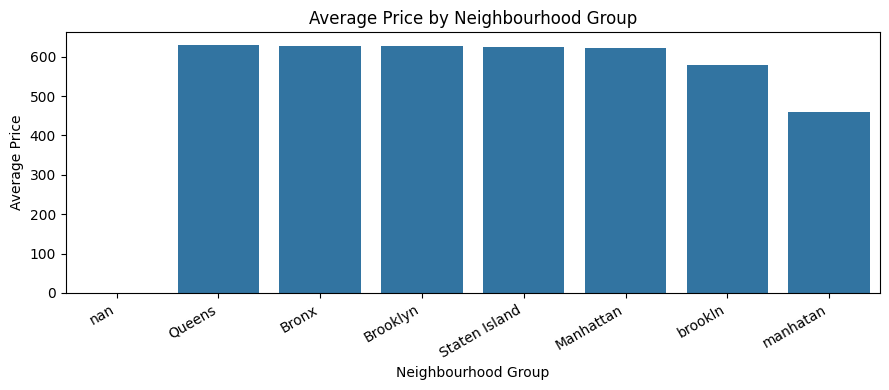

Plotted bar chart of average prices by neighbourhood group


In [6]:
# Compute average price by neighbourhood group and plot a sorted bar chart
# Load df if not present, groupby, sort descending, print table head, and plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Airbnb_Open_Data.xlsx'
try:
    df_airbnb
except NameError:
    df_airbnb = pd.read_excel(file_path, sheet_name='in')

# Ensure price is numeric
prices = pd.to_numeric(df_airbnb['price'], errors='coerce')
ng = df_airbnb['neighbourhood group']
avg_price = pd.DataFrame({'neighbourhood group': ng, 'price': prices}).groupby('neighbourhood group', dropna=False)['price'].mean().sort_values(ascending=False)

avg_price_df = avg_price.reset_index()
print(avg_price_df.head(20))
print('Computed average price by neighbourhood group')

plt.figure(figsize=(9,4))
sns.barplot(data=avg_price_df, x='neighbourhood group', y='price', order=avg_price_df['neighbourhood group'])
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()
print('Plotted bar chart of average prices by neighbourhood group')

In [ ]:
ng_col = 'neighbourhood group' if 'neighbourhood group' in df_airbnb.columns else 'neighborhood group'
price_col = 'price'
avg_price_by_ng = df_airbnb.groupby(ng_col, dropna=False)[price_col].mean().sort_values(ascending=False)
print(avg_price_by_ng)
print('Computed average price by neighbourhood group')



neighbourhood group
NaN              658.357143
Queens           630.207647
Bronx            627.766359
Brooklyn         626.562193
Staten Island    624.490546
Manhattan        622.440227
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64
Computed average price by neighbourhood group


In [ ]:
year_col = 'construction year'  # adjust if needed (sometimes: 'year of construction' or 'Construction year')
if year_col not in df_airbnb.columns:
  year_col = 'year of construction' if 'year of construction' in df_airbnb.columns else 'Construction year' if 'Construction year' in df_airbnb.columns else None

if year_col is None:
  print('Construction year column not found')
else:
  sub = df_airbnb[[year_col, price_col]].copy()
sub[year_col] = pd.to_numeric(sub[year_col], errors='coerce')
sub[price_col] = pd.to_numeric(sub[price_col], errors='coerce')
sub = sub.dropna()
corr_val = sub[year_col].corr(sub[price_col])
print(corr_val)
print('Computed correlation between construction year and price')



-0.003753294648552591
Computed correlation between construction year and price


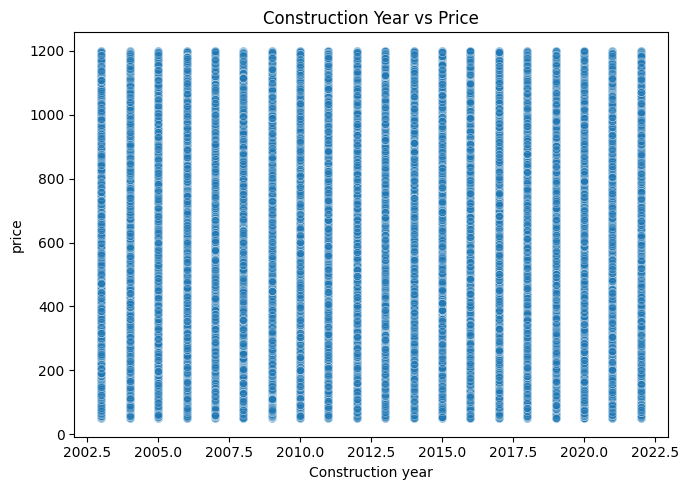

Plotted scatter of construction year vs price


In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=sub, x=year_col, y=price_col, alpha=0.4)
plt.title('Construction Year vs Price')
plt.tight_layout()
plt.show()
print('Plotted scatter of construction year vs price')

  host_identity_verified  review_rate_number
0            unconfirmed            3.271767
1               verified            3.286684
Computed average review rate number by verification status


/tmp/ipython-input-1132647959.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rates2, x='host_identity_verified', y='review_rate_number', palette='Greens')


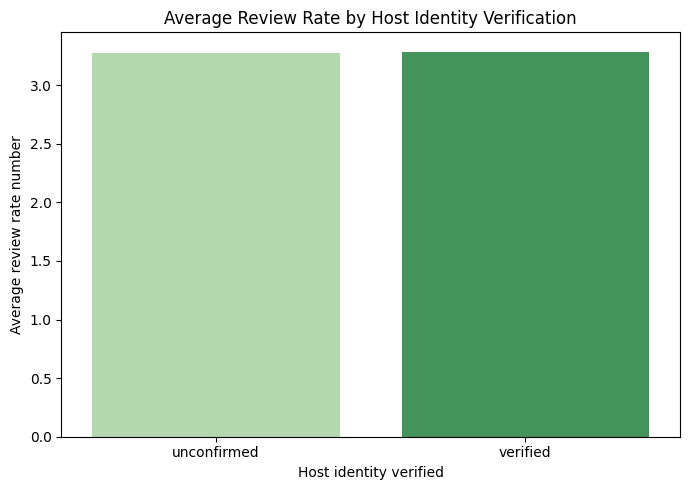

Plotted bar chart


In [11]:
# Compute and visualize average review rate number for verified vs unconfirmed hosts
# Use correct column names discovered; groupby and plot bar chart
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df_airbnb already loaded earlier
status = df_airbnb['host_identity_verified']
reviews = pd.to_numeric(df_airbnb['review rate number'], errors='coerce')
mask_ok = status.notna() & reviews.notna()
df_cmp2 = pd.DataFrame({'host_identity_verified': status[mask_ok], 'review_rate_number': reviews[mask_ok]})

avg_rates2 = df_cmp2.groupby('host_identity_verified')['review_rate_number'].mean().reset_index()
print(avg_rates2)
print('Computed average review rate number by verification status')

plt.figure(figsize=(7,5))
sns.barplot(data=avg_rates2, x='host_identity_verified', y='review_rate_number', palette='Greens')
plt.title('Average Review Rate by Host Identity Verification')
plt.xlabel('Host identity verified')
plt.ylabel('Average review rate number')
plt.tight_layout()
plt.show()
print('Plotted bar chart')

In [ ]:
host_id_col = 'host id' if 'host id' in df_airbnb.columns else 'host_id'
host_name_col = 'host name' if 'host name' in df_airbnb.columns else 'host_name' if 'host_name' in df_airbnb.columns else None
count_col = 'calculated host listings count' if 'calculated host listings count' in df_airbnb.columns else 'calculated_host_listings_count'

cols = [c for c in [host_id_col, host_name_col, count_col] if c is not None]
top_hosts = df_airbnb[cols].dropna(subset=[count_col]).sort_values(count_col, ascending=False).drop_duplicates(subset=[host_id_col]).head(10)
print(top_hosts)
print('Listed top 10 hosts by calculated listings count')

           host id   host name  calculated host listings count
64244    695353567  Blueground                           332.0
66258  59913507223  Blueground                           332.0
57898  44375550153  Blueground                           332.0
66155  80832323346  Blueground                           332.0
64991  26125388039  Blueground                           332.0
67152  83842788941  Blueground                           332.0
64894  52360647654  Blueground                           332.0
65271   3405726007  Blueground                           332.0
66185  70352033029  Blueground                           332.0
62920   6866703084  Blueground                           332.0
Listed top 10 hosts by calculated listings count


verified
verified       3.286684
unconfirmed    3.271767
Name: metric, dtype: float64
Computed average review metric by verification status


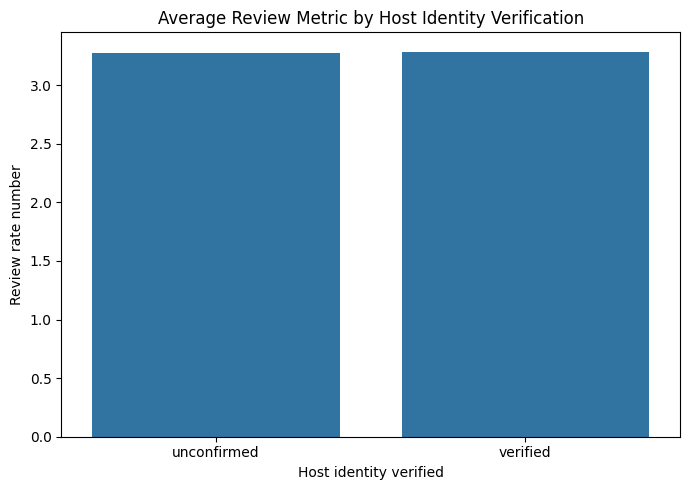

Plotted verification vs review metric


In [ ]:
verify_col = 'host_identity_verified' if 'host_identity_verified' in df_airbnb.columns else 'host identity verified'
rating_col = 'review rate number' if 'review rate number' in df_airbnb.columns else 'review_rate_number' if 'review_rate_number' in df_airbnb.columns else None
alt_rating_col = 'reviews per month' if 'reviews per month' in df_airbnb.columns else 'reviews_per_month'

metric_col = rating_col if rating_col is not None else alt_rating_col
metric_series = pd.to_numeric(df_airbnb[metric_col], errors='coerce')
verify_series = df_airbnb[verify_col]

cmp_df = pd.DataFrame({'verified': verify_series, 'metric': metric_series}).dropna()
avg_by_ver = cmp_df.groupby('verified')['metric'].mean().sort_values(ascending=False)
print(avg_by_ver)
print('Computed average review metric by verification status')

plt.figure(figsize=(7,5))
sns.barplot(data=cmp_df, x='verified', y='metric', estimator='mean', errorbar=None)
plt.title('Average Review Metric by Host Identity Verification')
plt.xlabel('Host identity verified')
ylabel = 'Review rate number' if rating_col is not None else 'Reviews per month'
plt.ylabel(ylabel)
plt.tight_layout()
plt.show()
print('Plotted verification vs review metric')



In [ ]:
svc_col = 'service fee' if 'service fee' in df_airbnb.columns else 'service_fee'
if svc_col not in df_airbnb.columns:
  print('Service fee column not found')
else:
  sub = df_airbnb[[price_col, svc_col]].copy()
sub[price_col] = pd.to_numeric(sub[price_col], errors='coerce')
sub[svc_col] = pd.to_numeric(sub[svc_col], errors='coerce')
sub = sub.dropna()
corr_ps = sub[price_col].corr(sub[svc_col])
print(corr_ps)
print('Computed correlation between price and service fee')



0.9999908755543349
Computed correlation between price and service fee


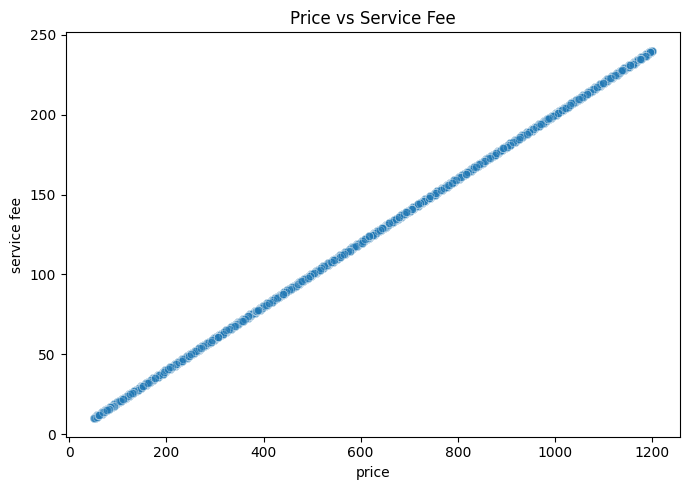

Plotted scatter of price vs service fee


In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=sub, x=price_col, y=svc_col, alpha=0.4)
plt.title('Price vs Service Fee')
plt.tight_layout()
plt.show()
print('Plotted scatter of price vs service fee')

In [ ]:
ng_col = 'neighbourhood group' if 'neighbourhood group' in df_airbnb.columns else 'neighborhood group'
room_col = 'room type' if 'room type' in df_airbnb.columns else 'room_type'
rating_col = 'review rate number' if 'review rate number' in df_airbnb.columns else 'review_rate_number' if 'review_rate_number' in df_airbnb.columns else None

if rating_col is None:
  print('Review rate number column not found')
else:
  ratings = pd.to_numeric(df_airbnb[rating_col], errors='coerce')
overall_avg = ratings.mean()
print(overall_avg)
print('Computed overall average review rate number')

3.279105922384207
Computed overall average review rate number


room           Entire home/apt  Hotel room  Private room  Shared room
ng                                                                   
Bronx                 3.346457         NaN      3.329706     3.264957
Brooklyn              3.250378        3.75      3.264465     3.336983
Manhattan             3.275807        3.50      3.277576     3.257459
Queens                3.349154        3.75      3.315585     3.377778
Staten Island         3.329087         NaN      3.479482     3.533333
brookln                    NaN         NaN      4.000000          NaN
manhatan                   NaN         NaN      3.000000          NaN
Created pivot of average review rate by neighbourhood group and room type


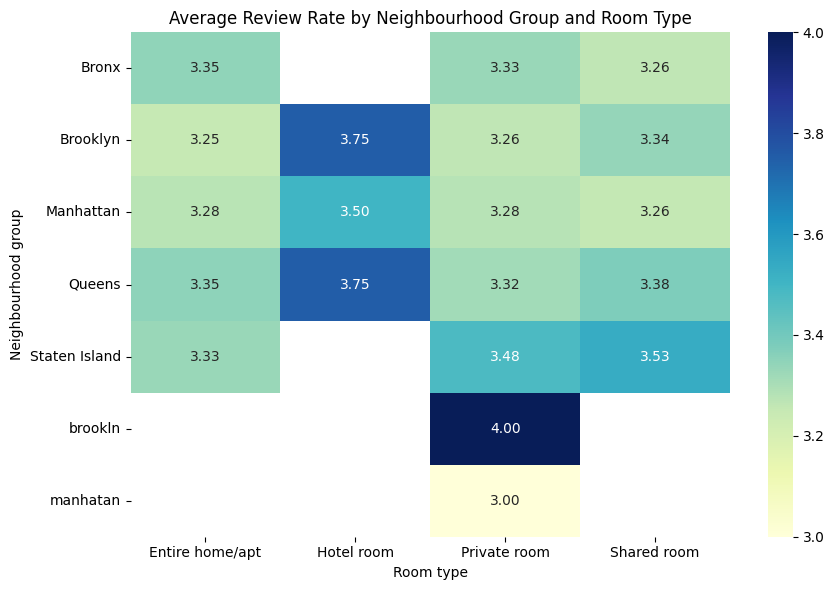

Plotted heatmap of average review rate


In [ ]:
mask = ratings.notna() & df_airbnb[ng_col].notna() & df_airbnb[room_col].notna()
pivot_df = pd.DataFrame({
    'ng': df_airbnb.loc[mask, ng_col],
    'room': df_airbnb.loc[mask, room_col],
    'rate': ratings.loc[mask]
})
pivot_avg = pivot_df.pivot_table(index='ng', columns='room', values='rate', aggfunc='mean')
print(pivot_avg)
print('Created pivot of average review rate by neighbourhood group and room type')

plt.figure(figsize=(9,6))
sns.heatmap(pivot_avg, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Average Review Rate by Neighbourhood Group and Room Type')
plt.xlabel('Room type')
plt.ylabel('Neighbourhood group')
plt.tight_layout()
plt.show()
print('Plotted heatmap of average review rate')

In [ ]:
count_col = 'calculated host listings count' if 'calculated host listings count' in df_airbnb.columns else 'calculated_host_listings_count'
avail_col = 'availability_365' if 'availability_365' in df_airbnb.columns else 'availability 365' if 'availability 365' in df_airbnb.columns else None

if avail_col is None:
  print('Availability column not found')
else:
  sub = df_airbnb[[count_col, avail_col]].copy()
sub[count_col] = pd.to_numeric(sub[count_col], errors='coerce')
sub[avail_col] = pd.to_numeric(sub[avail_col], errors='coerce')
sub = sub.dropna()
corr_ca = sub[count_col].corr(sub[avail_col])
print(corr_ca)
print('Computed correlation between calculated host listings count and availability')



0.1591942422813064
Computed correlation between calculated host listings count and availability


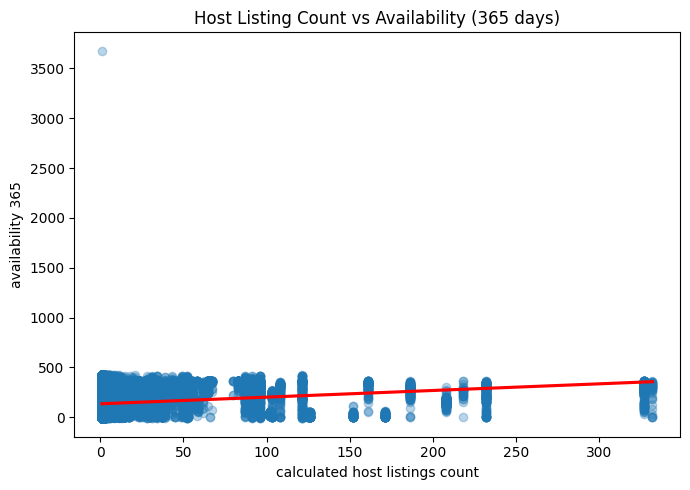

Plotted relationship between host listing count and availability


In [ ]:
plt.figure(figsize=(7,5))
sns.regplot(data=sub, x=count_col, y=avail_col, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Host Listing Count vs Availability (365 days)')
plt.tight_layout()
plt.show()
print('Plotted relationship between host listing count and availability')

room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64


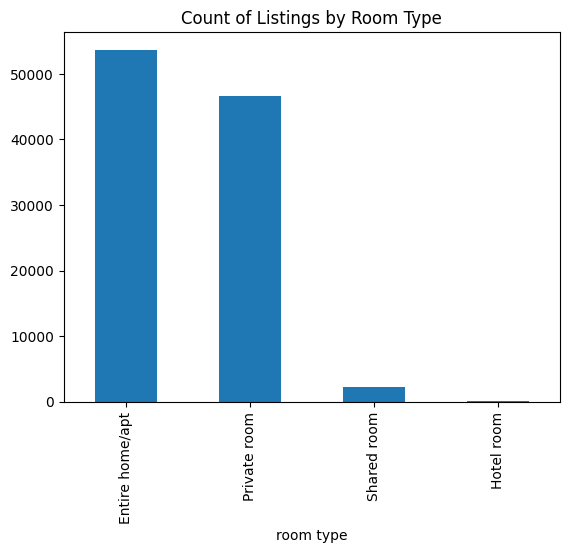

In [ ]:
# Assuming the column is 'room type' (you must confirm the exact name)
property_counts = df_airbnb['room type'].value_counts()

print(property_counts)

# To create a bar chart
import matplotlib.pyplot as plt
property_counts.plot(kind='bar', title='Count of Listings by Room Type')
plt.show()